<a href="https://colab.research.google.com/github/coyosi-hub/coyosi/blob/master/numba_blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was written in google colab.
It requires numba installation
The notebook reads an image files and run a blur function on the image
It begins by running it using the CPU
After that it does the same operation but using JIT in order to improve performance
The original image and the two output images are displayed 


In [1]:
import numpy as np
from PIL import Image
from numba import jit

Load an image from your computer:


In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(filename)

Saving Sharp-Pencil-Tip-300x199.jpg to Sharp-Pencil-Tip-300x199 (2).jpg
Sharp-Pencil-Tip-300x199.jpg


This is the blur function (Copied from wikipedia)

In [3]:


def blur(image, new_image):
    height = image.shape[0]
    width = image.shape[1]
      
    for x in range(1, height - 1):
        for y in range(1, width -1):
            sum = float(image[x - 1, y + 1]) + \
              image[x + 1, y + 1] + \
              image[x + 0, y + 1] + \
              image[x - 1, y + 0] + \
              image[x + 0, y + 0] + \
              image[x + 1, y + 0] + \
              image[x - 1, y - 1] + \
              image[x + 0, y - 1] + \
              image[x + 1, y - 1];

            new_image[x-1,y-1] = sum / 9    

Read the image and verify the dimension.
This script handles only RGB images


In [4]:
### Read the image and translate it to numpy array
img = Image.open(filename);

imgArray = np.array(img)

### Veirfy the dimensions of the image
height = imgArray.shape[0]
width = imgArray.shape[1]
chnls = imgArray.shape[2]
if(chnls != 3):
        print("Incorrect image format")

red, green, blue = img.split()

I padded the images. Not really necessary but doesn't do any harm.

In [5]:
pad_width = 1
redArray = np.array(red)
greenArray = np.array(green)
blueArray = np.array(blue)
redArray = np.pad(redArray, pad_width, mode='edge')
greenArray = np.pad(greenArray, pad_width, mode='edge')
blueArray = np.pad(blueArray, pad_width, mode='edge')

Create 6 empty numpy arrays for the blur operation

In [6]:
new_shape = [height, width]    
new_image_1 = np.empty(new_shape)
new_image_2 = np.empty(new_shape)
new_image_3 = np.empty(new_shape)
new_image_4 = np.empty(new_shape)
new_image_5 = np.empty(new_shape)
new_image_6 = np.empty(new_shape)


In [7]:
%time blur(redArray, new_image_1)

CPU times: user 278 ms, sys: 493 µs, total: 279 ms
Wall time: 279 ms


In [8]:
%time blur(greenArray, new_image_2)

CPU times: user 270 ms, sys: 2.47 ms, total: 272 ms
Wall time: 273 ms


In [9]:
%time blur(blueArray, new_image_3)

CPU times: user 267 ms, sys: 0 ns, total: 267 ms
Wall time: 268 ms


Now run the blur operation on the GPU

In [10]:
blur_jit = jit(blur)

In [11]:
%time blur_jit(redArray, new_image_4)

CPU times: user 391 ms, sys: 30.2 ms, total: 421 ms
Wall time: 424 ms


In [12]:
%time blur_jit(greenArray, new_image_5)

CPU times: user 805 µs, sys: 0 ns, total: 805 µs
Wall time: 933 µs


In [13]:
%time blur_jit(blueArray, new_image_6)

CPU times: user 693 µs, sys: 0 ns, total: 693 µs
Wall time: 696 µs


In [14]:
blurred_img_cpu = Image.fromarray(np.dstack((new_image_1,new_image_2,new_image_3)).astype(np.uint8))



In [15]:
blurred_img_jit = Image.fromarray(np.dstack((new_image_4,new_image_5,new_image_6)).astype(np.uint8))

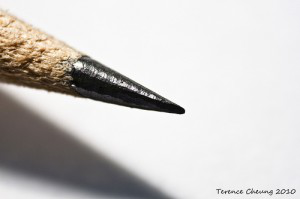

In [16]:
img

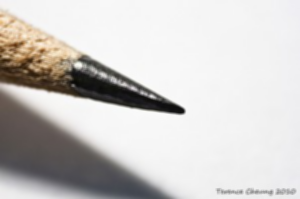

In [17]:
blurred_img_cpu

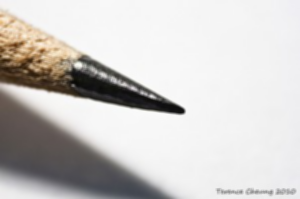

In [18]:
blurred_img_jit

